# Pandas

Chart Visualization:
https://pandas.pydata.org/docs/user_guide/visualization.html#scatter-plot

In [1]:
import pandas as pd
import numpy as np

## Line

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

In [3]:
ts.head()

2000-01-01   -0.034936
2000-01-02    1.448325
2000-01-03    1.401537
2000-01-04    0.100772
2000-01-05    1.827798
Freq: D, dtype: float64

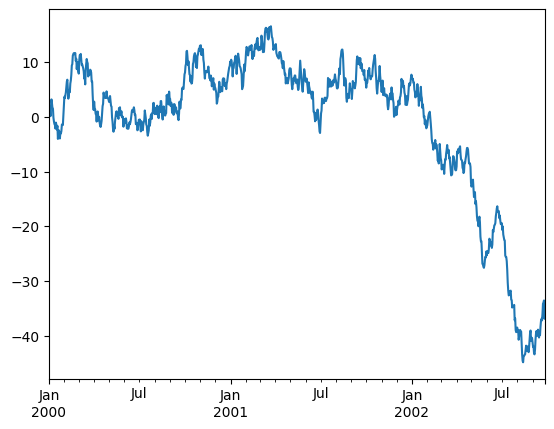

In [5]:
ts.plot();

In [15]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
print(df.shape)

(1000, 4)


In [16]:
df.head()

,A,B,C,D
2000-01-01,-2.091522,-1.367866,0.461541,0.958894
2000-01-02,-1.792205,-2.489829,-0.083001,-0.032036
2000-01-03,-1.049643,-1.419150,-0.506577,-0.796332
2000-01-04,0.131647,-1.571002,0.909482,0.464590
2000-01-05,0.574759,-2.359544,1.297304,0.538847


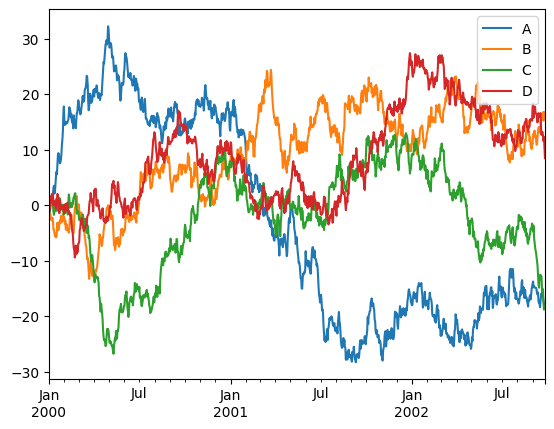

In [17]:
df.plot();

## Bar plots

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv', sep=';')

In [15]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


<Axes: xlabel='looks'>

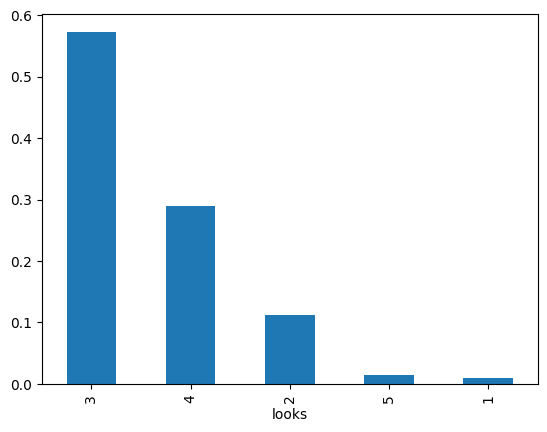

In [18]:
df.looks.value_counts(normalize=True).plot(kind="bar")

In [20]:
female_wage = df.groupby('female')['wage'].mean()
female_wage

female
0    7.368823
1    4.299358
Name: wage, dtype: float64

In [21]:
type(female_wage)

pandas.core.series.Series

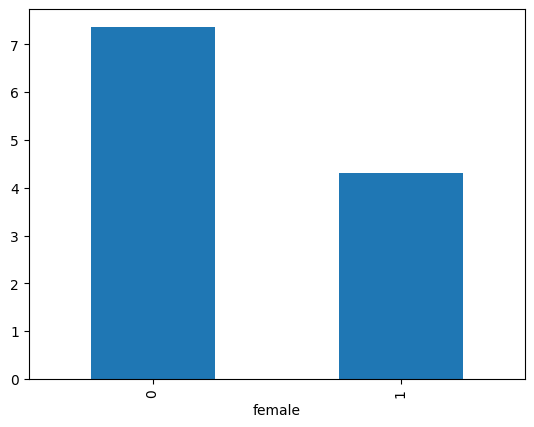

In [27]:
female_wage.plot(kind='bar');

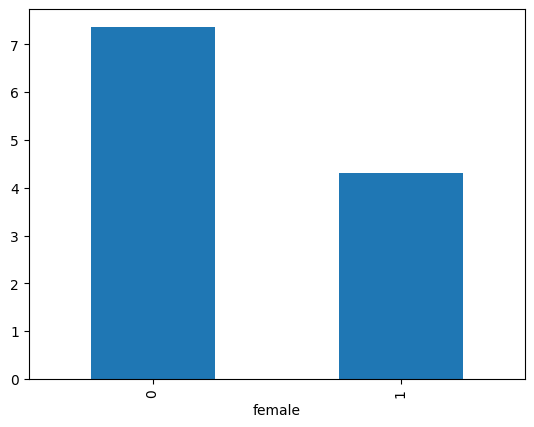

In [29]:
female_wage.plot.bar();

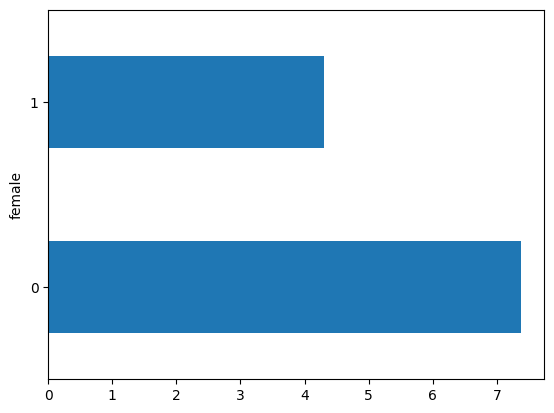

In [13]:
female_wage.plot.barh();

In [26]:
looks_wage = df.groupby(['female','looks'])['wage'].mean()
looks_wage

female  looks
0       1        6.163750
        2        6.249091
        3        7.598957
        4        7.226447
        5        9.923636
1       1        2.154000
        2        3.829074
        3        4.207854
        4        4.745074
        5        3.902500
Name: wage, dtype: float64

In [31]:
looks_wage = looks_wage.unstack()
looks_wage

looks,1,2,3,4,5
female,,,,,
0,6.16375,6.249091,7.598957,7.226447,9.923636
1,2.15400,3.829074,4.207854,4.745074,3.902500


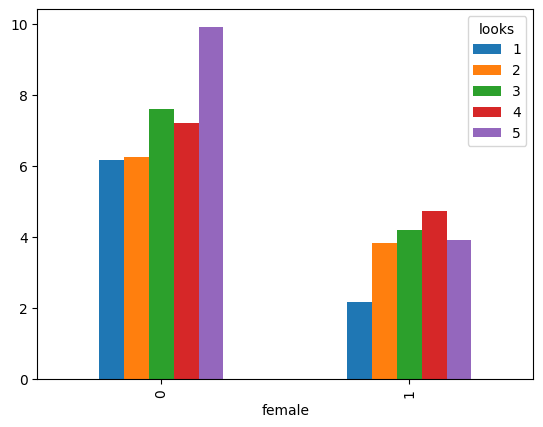

In [32]:
looks_wage.plot.bar();

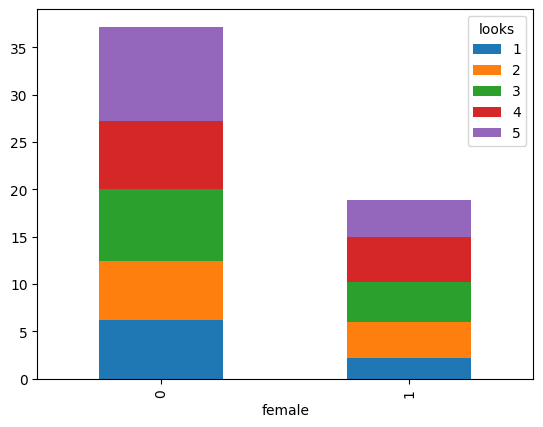

In [34]:
looks_wage.plot.bar(stacked=True);

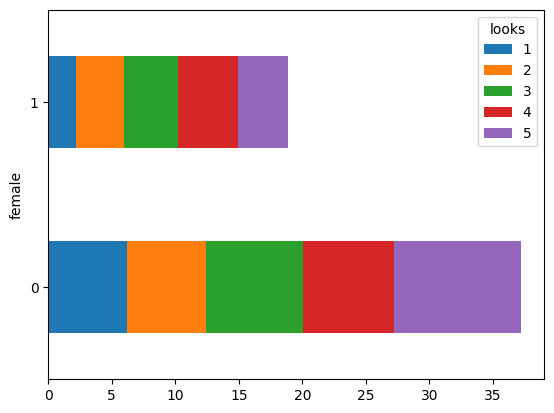

In [37]:
looks_wage.plot(stacked=True, kind="barh");

## Histograms

In [40]:
df[['wage']].describe()

,wage
count,1260.000000
mean,6.306690
std,4.660639
min,1.020000
25%,3.707500
50%,5.300000
75%,7.695000
max,77.720000


In [45]:
pd.cut(df['wage'], bins=10).value_counts(normalize=True).sort_index()

wage
(0.943, 8.69]     0.822222
(8.69, 16.36]     0.149206
(16.36, 24.03]    0.018254
(24.03, 31.7]     0.007143
(31.7, 39.37]     0.001587
(39.37, 47.04]    0.000794
(47.04, 54.71]    0.000000
(54.71, 62.38]    0.000000
(62.38, 70.05]    0.000000
(70.05, 77.72]    0.000794
Name: proportion, dtype: float64

In [46]:
pd.qcut(df['wage'], q=10).value_counts(normalize=True).sort_index()

wage
(1.0190000000000001, 2.31]    0.101587
(2.31, 3.29]                  0.100000
(3.29, 3.89]                  0.100000
(3.89, 4.62]                  0.106349
(4.62, 5.3]                   0.092063
(5.3, 6.226]                  0.100000
(6.226, 7.21]                 0.100794
(7.21, 8.37]                  0.099206
(8.37, 10.291]                0.100000
(10.291, 77.72]               0.100000
Name: proportion, dtype: float64

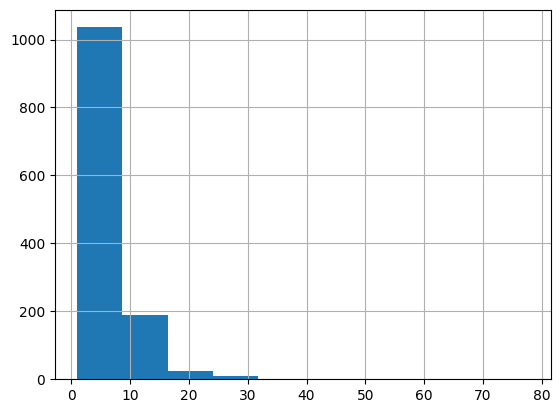

In [47]:
df['wage'].hist();

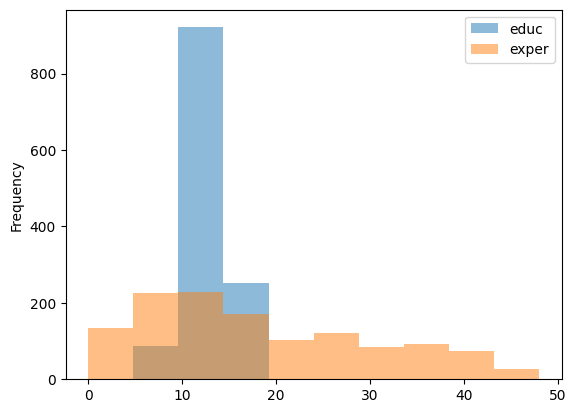

In [48]:
df[['educ', 'exper']].plot.hist(alpha=0.5);

## Box plot

In [21]:
#exper_educ = df.groupby(['exper', 'educ'])['wage'].mean().unstack()

In [22]:
#exper_educ

In [23]:
#exper_educ.plot.box();

In [53]:
df.shape

(1260, 10)

In [54]:
educ_wage = df.groupby([df.index, 'educ'])['wage'].mean().unstack()
educ_wage.shape

(1260, 8)

In [55]:
educ_wage

educ,5,8,10,12,13,14,16,17
0,NaN,NaN,NaN,NaN,NaN,5.73,NaN,NaN
1,NaN,NaN,NaN,4.28,NaN,NaN,NaN,NaN
2,NaN,NaN,7.96,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,11.57,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,11.42,NaN
...,...,...,...,...,...,...,...,...
1255,NaN,NaN,NaN,1.61,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,1.68,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,3.29,NaN,NaN,NaN,NaN
1258,NaN,NaN,2.31,NaN,NaN,NaN,NaN,NaN


<img src="https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

<Axes: >

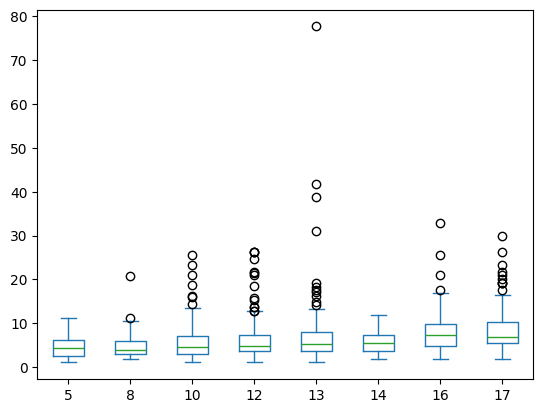

In [56]:
educ_wage.plot.box()

<Axes: >

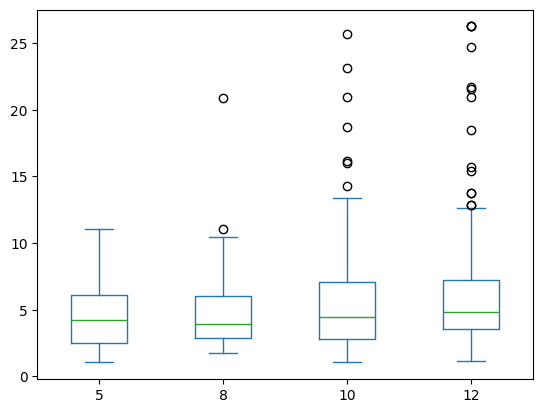

In [57]:
educ_wage.iloc[:,:4].plot.box()

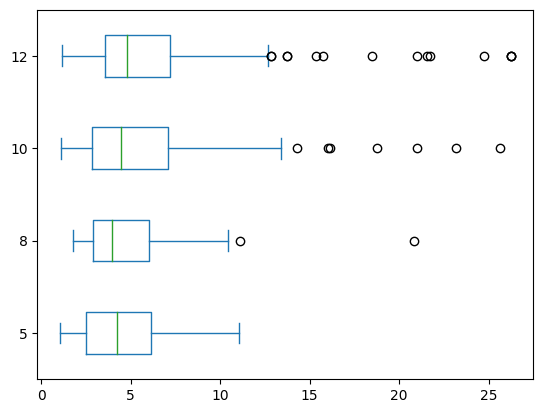

In [28]:
educ_wage.iloc[:,:4].plot.box(vert=False);

## Area plot

In [58]:
educ_looks = df.groupby(['educ','looks'])['wage'].mean().unstack()
educ_looks

looks,1,2,3,4,5
educ,,,,,
5,2.320,4.488750,4.781739,5.360000,NaN
8,2.730,4.231250,4.857308,6.196667,NaN
10,NaN,5.109048,5.811081,4.564348,4.490000
12,6.502,4.774082,6.124569,5.206232,5.177778
13,3.605,5.511481,6.704627,6.871875,9.966667
14,NaN,3.965714,6.390400,5.212222,4.950000
16,8.350,7.253333,7.828767,8.015128,3.475000
17,NaN,7.851250,8.731429,8.401400,15.830000


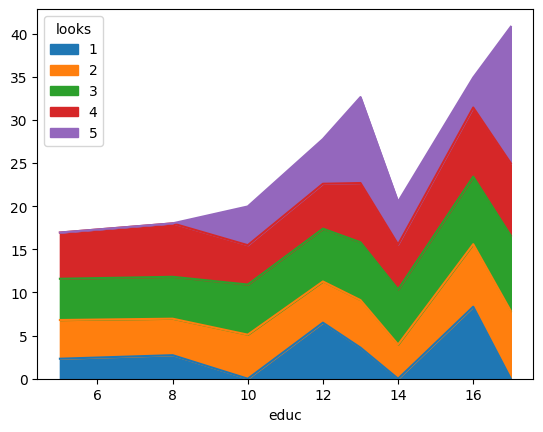

In [59]:
educ_looks.plot.area();

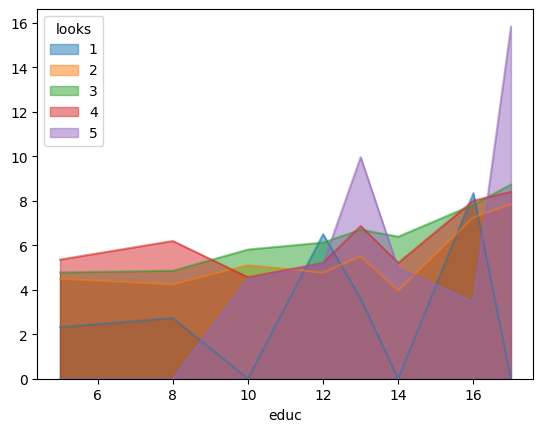

In [60]:
educ_looks.plot.area(stacked=False);

## Scatter plot

In [61]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


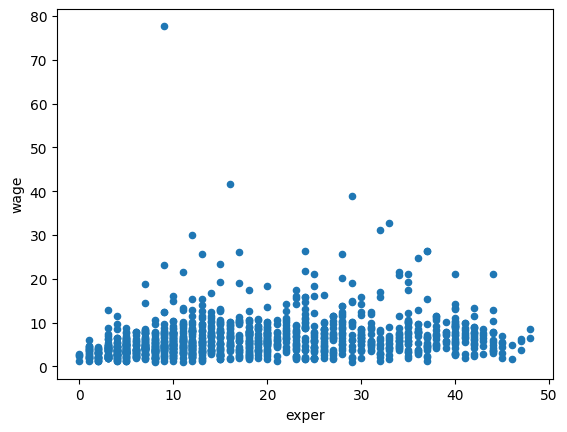

In [62]:
df.plot.scatter(x='exper', y='wage');

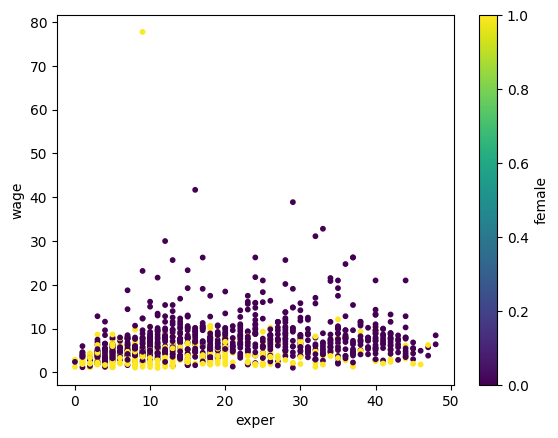

In [68]:
df.plot.scatter(x='exper', y='wage', c='female', cmap="viridis", s=10);

## Pie plot

In [28]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

In [29]:
series

a    1.443073
b    1.681658
c    0.555860
d    1.766732
Name: series, dtype: float64

In [30]:
series.sum()

5.447322618446154

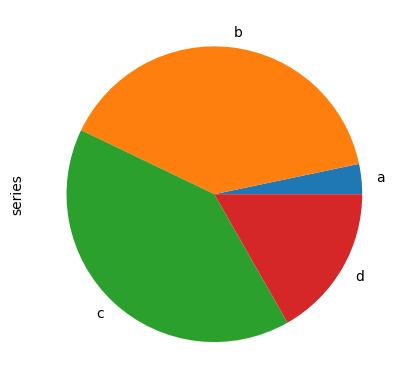

In [74]:
series.plot.pie();

In [31]:
looks_count = df['looks'].value_counts()

In [32]:
looks_count

looks
3    722
4    364
2    142
5     19
1     13
Name: count, dtype: int64

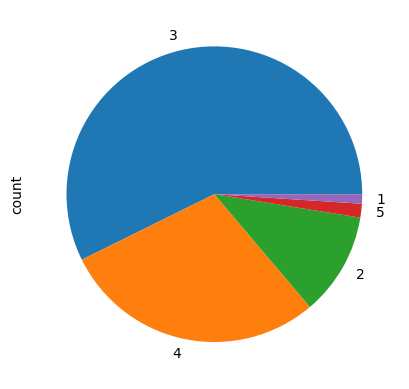

In [77]:
looks_count.plot.pie();

## Pandas_profiling

# Новый раздел

In [78]:
df

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [81]:
!pip install ydata-profiling[notebook]

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ------------------ ------------------- 41.0/85.1 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 85.1/85.1 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   - -------------------------------------- 0.2/4.7 MB 4.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.5/4.7 MB 6.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.0/4.7 MB 7.3 MB/s eta 0:00


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
phik 0.12.4 requires joblib>=0.14.1, which is not installed.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pydantic-2.6.4-py3-none-any.whl.metadata (85 kB)
  Using cached phik-0.12.4-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached multimethod-1.11.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
Using cached multimethod-1.11.2-py3-none-any.whl (10 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
    --------------------------------------- 0.1/2.7 MB 1.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.7 MB 3.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 4.4 MB/s eta 0:00:01
   --------------- ------------------------

In [82]:
import pandas_profiling

C:\Users\dedko\AppData\Local\Temp\ipykernel_9628\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [83]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("my_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\dedko\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
C:\Users\dedko\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
C:\Users\dedko\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
C:\Users\dedko\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_cate

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]